In [30]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.svm import LinearSVC
import seaborn as sns
import matplotlib.pyplot as plt

In [31]:
%store -r mixed_flows
# %store -r features
features = ['dstPortClassN', 'maxPktSz', 'avePktSize', 'stdPktSize', 'pktAsm',
            'bytAsm', 'ipMindIPID', 'ipMaxdIPID', 'ipMinTTL', 'ipMaxTTL', 
            'tcpSeqSntBytes', 'tcpTmS', 'tcpTmER', 'connDip', 'connSipDprt',
            'connF', 'maxIAT', 'stdIAT']

normalizer = preprocessing.Normalizer(norm="l2")
normalized_train = normalizer.fit_transform(mixed_flows[features]) #axis?
X = pd.DataFrame(normalized_train, columns = features)
y = mixed_flows.is_attack
X

,dstPortClassN,maxPktSz,avePktSize,stdPktSize,pktAsm,bytAsm,ipMindIPID,ipMaxdIPID,ipMinTTL,ipMaxTTL,tcpSeqSntBytes,tcpTmS,tcpTmER,connDip,connSipDprt,connF,maxIAT,stdIAT
0,3.229679e-02,2.260046e-03,7.533485e-04,7.841099e-04,0.000000e+00,0.000000e+00,7.290472e-05,9.994507e-01,4.665902e-03,4.665902e-03,2.260046e-03,0.000000,0.000000,7.290472e-05,2.916189e-04,2.916189e-04,1.377987e-05,5.286219e-06
1,9.880951e-01,6.914435e-02,2.304811e-02,2.398923e-02,0.000000e+00,0.000000e+00,2.230463e-03,2.230463e-03,8.029666e-02,8.029666e-02,6.914435e-02,0.000000,0.000000,2.230463e-03,6.691389e-03,6.691389e-03,2.408900e-07,7.277577e-08
2,1.357798e-04,1.581543e-04,3.548596e-05,5.199792e-05,1.802945e-08,2.192173e-07,3.065006e-07,1.795940e-02,1.961604e-05,1.961604e-05,3.190671e-04,0.999839,0.000000,3.065006e-07,1.839004e-06,6.130012e-07,2.840645e-06,8.171523e-07
3,1.240670e-02,3.976866e-03,6.056319e-04,1.088995e-03,-1.647418e-06,-2.003070e-05,2.800610e-05,9.999017e-01,9.802134e-04,9.802134e-04,4.817049e-03,0.000000,0.000000,8.401829e-05,1.400305e-04,1.400305e-04,2.595496e-04,7.759717e-05
4,1.357498e-04,1.581194e-04,3.547814e-05,5.198645e-05,1.802547e-08,2.191690e-07,3.064330e-07,1.224660e-02,1.961171e-05,1.961171e-05,3.189968e-04,0.999925,0.000000,3.064330e-07,2.451464e-06,4.902928e-07,2.875863e-06,8.284548e-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1366303,2.884110e-07,6.022125e-07,8.525839e-08,2.793999e-08,-2.125298e-10,-9.551905e-11,6.510406e-10,6.510406e-10,4.166660e-08,4.166660e-08,4.160540e-05,0.000498,1.000000,6.510406e-10,1.302081e-09,1.302081e-09,1.005161e-08,1.564849e-09
1366304,2.884110e-07,9.427067e-07,5.818125e-08,7.420567e-08,2.125298e-10,9.551904e-11,6.510405e-10,2.941792e-05,1.484372e-07,1.484372e-07,5.602790e-05,1.000000,0.000498,6.510405e-10,6.510405e-10,6.510405e-10,9.778271e-09,4.764551e-09
1366305,1.638788e-06,1.620607e-07,3.644508e-10,3.840084e-09,2.078312e-12,3.406843e-11,3.134637e-10,3.134637e-10,2.006168e-08,2.006168e-08,6.476160e-07,0.002354,0.999997,3.134637e-10,6.269274e-10,6.269274e-10,1.416863e-08,3.114556e-09
1366306,1.638765e-06,4.357084e-08,2.969040e-10,1.948910e-09,-2.078283e-12,-3.406795e-11,3.134593e-10,2.054256e-05,1.347875e-08,1.786718e-08,5.112521e-07,0.999997,0.002338,3.134593e-10,3.134593e-10,3.134593e-10,1.416841e-08,2.728146e-09


              precision    recall  f1-score   support

      benign       0.97      0.97      0.97    386200
      attack       0.81      0.83      0.82     64682

    accuracy                           0.95    450882
   macro avg       0.89      0.90      0.89    450882
weighted avg       0.95      0.95      0.95    450882



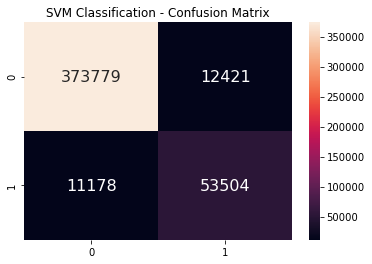

In [33]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.33, random_state = 1, stratify=y)

classifier = LinearSVC(random_state = 0)
classifier.fit(X_train, Y_train)
Y_test_prediction = classifier.predict(X_test)
conf_matrix = confusion_matrix(Y_test, Y_test_prediction)
plt.figure()
sns.heatmap(conf_matrix, annot=True, annot_kws={"size": 16}, fmt='g')
plt.title('SVM Classification - Confusion Matrix')
print(classification_report(Y_test, Y_test_prediction, target_names=["benign", "attack"]))